In [44]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram

In [45]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### Using Statevector Simulator

In [46]:
simulator = Aer.get_backend('statevector_simulator')

### GHZ State

In [47]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

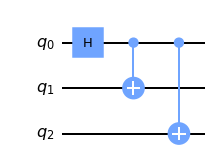

In [48]:
circ.draw('mpl')

In [49]:
# Create a Quantum Program for execution
result = simulator.run(circ).result()

In [50]:
counts = result.get_counts(circ)
print(counts)

{'000': 0.5, '111': 0.5}


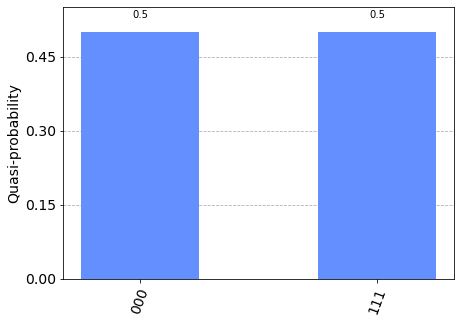

In [51]:
plot_histogram(counts)

### Using Aer Simulator

In [52]:
simulator = Aer.get_backend('aer_simulator')

In [53]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

In [54]:
circ.measure_all()
circ = transpile(circ, simulator)

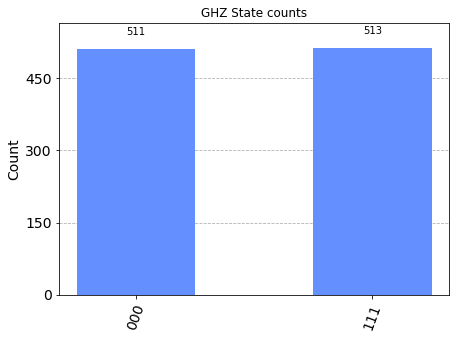

In [55]:
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='GHZ State counts')

In [56]:
result = simulator.run(circ, shots=10, memory=True).result()

In [57]:
memory = result.get_memory(circ)
print(memory)

['111', '000', '111', '111', '111', '000', '111', '111', '111', '000']


### How to use a provider

In [ ]:
# IBMQ.load_account()

# provider = IBMQ.get_provider(hub = 'ibm-q')

# device = provider.get_backend('ibmq_16_melbourne')

# job = execute(circuit,backend = device,shots = 1024)

# print(job.job_id())

# device_result = job.result()

# plot_histogram(device_result.get_counts(circuit))